**Data context**

In India, as in some other Asian cultures, feticide has been a historically prevalent practice. Traditionally, male offspring were perceived to have greated value than female, resulting in the killing of infant girls, or more recently as sex testing in the womb has become available, prenatal girls. There are a number of reasons that people give for continuing this practice, but thankfully it is becoming much less widespread. 


**The Problem**

From a moral perspective, this is clearly an awful practice and the problem -- that newborns should not be killed based simply on their gender -- is obvious. One of the main methods of combatting this practice, according to a survey of people living in India, is to strengthen policies and enforce laws against it. To create more effective policies, more data is needed, and that data needs to be examined for useful correlations. 


**The Potential Solution**

I predict that the education level of people in different cities will have a strong correlation with decreasing frequency of the feticide practice. My theory is that the more educated the population, the more equal the child sex ratio, and thus the fewer feticide occurrences we will see. 


**The Method of Testing the Solution**

The data is organized by city, but since I would like equal population sample sizes, I will divide the population totals in half. This will result in many more cities in one half, since the larger cities will contribute more to the population total. I will then calculate the graduate and literacy rates of each sample and perform a t-test to compare them, paired with the p-value. I will then look at the child sex ratio of the different samples and perform t- and p-tests to see if there is a significant difference. (I will use the child sex ratio instead of the overall sex ratio because this will give a clearer snapshot of children being born in these cities, rather than including those who may have moved there for various reasons.) If there are significant differences in both education and child sex ratios, I can conclude that increased education levels is correlated with lower feticide. 

It is worth noting that looking at the child sex ratio is a proxy for feticide rates. Since data for actual feticide could be skewed by many factors and difficult to obtain, having a proxy of resulting population rates may be more effective. 

To check against Simpson's Paradox, I will also calculate literacy rates and sex ratios for each of India's 29 states. I am curious to see if local laws or other regional factors seem to have any effect on these rates. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import pylab as P
import plotly.plotly as py
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

cities = pd.read_csv('cities_r2.csv')

In [2]:
#Take a look at the data.
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
#Take a look at the data.
cities.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [4]:
#Rename columns to be more user-friendly.
cities.rename(columns = {'0-6_population_total':'young_population_total', 
                         '0-6_population_male':'young_population_male',
                        '0-6_population_female':'young_population_female'}, inplace = True)

In [5]:
#Find total population of cities in the dataset.
sum(cities.population_total)

220919400

In [6]:
#Sort cities by population size. 
top_cities = cities.sort_values(by='population_total', ascending=False)
#Split the cities into two roughly equal halves by population total.
cities_head = top_cities.head(42)
print('Top half:',sum(cities_head.population_total))
cities_tail = top_cities.tail(451)
print('Bottom half:',sum(cities_tail.population_total))

Top half: 110892201
Bottom half: 110027199


In [7]:
#Add another column categorizing the cities by size.
bins = [0, 1011000, 13000000]
group_names = ['medium', 'large']
cities['city_size'] = pd.cut(cities['population_total'], bins, labels=group_names)
cities

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,young_population_total,young_population_male,young_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,city_size
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,medium
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,medium
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,medium
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,medium
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,medium
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496,medium
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731,large
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591,large
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829,medium
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932,medium


In [8]:
cities_head

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,young_population_total,young_population_male,young_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,...,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,...,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,...,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,...,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
119,Chennai,33,TAMIL NADU,2,4681087,2357633,2323454,418541,213084,205457,...,1845974,986,964,90.33,93.47,87.16,"13.0826802,80.2707184",879695,487428,392267
274,Kolkata,19,WEST BENGAL,16,4486679,2362662,2124017,300052,155475,144577,...,1682088,899,930,87.14,89.08,84.98,"22.572646,88.363895",818476,461615,356861
449,Surat,24,GUJARAT,25,4462002,2538243,1923759,531522,293208,238314,...,1416640,758,813,89.03,92.76,84.05,"21.1702401,72.8310607",278795,160566,118229
380,Pune,27,MAHARASHTRA,25,3115431,1602137,1513294,324572,171152,153420,...,1195486,945,896,91.61,95.13,87.91,"18.5204303,73.8567437",656508,349022,307486
225,Jaipur,8,RAJASTHAN,12,3073350,1619280,1454070,378788,204320,174468,...,990584,898,854,84.34,90.61,77.41,"26.9124336,75.7872709",533148,319107,214041


In [9]:
cities_tail

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,young_population_total,young_population_male,young_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
388,Raipur,22,CHHATTISGARH,11,1010087,519286,490801,124471,64522,59949,...,349438,945,929,86.90,92.39,81.10,"21.2513844,81.6296413",147194,84384,62810
277,Kota,8,RAJASTHAN,29,1001365,529795,471570,118139,62958,55181,...,316028,890,876,83.65,90.56,75.90,"25.2138156,75.8647527",128652,73452,55200
193,Guwahati,18,ASSAM,23,963429,502255,461174,86806,43217,43589,...,372325,918,1009,91.11,92.89,89.16,"26.1445169,91.7362365",184065,107093,76972
115,Chandigarh,4,CHANDIGARH,1,960787,525226,435561,104192,56020,48172,...,317183,829,860,86.77,90.81,81.88,"30.7333148,76.7794179",189312,101491,87821
441,Solapur,27,MAHARASHTRA,30,951118,482194,468924,104466,54728,49738,...,319845,972,909,83.88,91.31,76.30,"17.6599188,75.9063906",88638,54159,34479
217,Hubli-Dharwad,29,KARNATAKA,8,943857,475980,467877,99989,51293,48696,...,347216,983,949,87.28,91.67,82.83,"15.3647083,75.1239547",113864,67478,46386
59,Bareilly,9,UTTAR PRADESH,19,898167,477438,420729,94915,50224,44691,...,247234,881,890,70.17,74.06,65.75,"28.3670355,79.4304381",110691,61065,49626
315,Moradabad,9,UTTAR PRADESH,4,889810,466432,423378,110376,57999,52377,...,248190,908,903,70.65,74.05,66.90,"28.8386481,78.7733286",91999,48955,43044
326,Mysore,29,KARNATAKA,23,887446,443813,443633,77988,40106,37882,...,339739,1000,945,86.84,89.96,83.73,"12.2958104,76.6393805",149306,85019,64287
192,Gurgaon,6,HARYANA,18,876824,475612,401212,108623,58842,49781,...,289805,844,846,86.30,89.54,82.46,"28.4594965,77.0266383",233817,126456,107361


In [10]:
#Calculate effective literacy rates, child sex ratios, and graduate rates for entire population.

head_pop_tot = sum(cities_head.population_total)
head_male_total = sum(cities_head.population_male)
head_female_total = sum(cities_head.population_female)
head_young_tot = sum(cities_head.young_population_total)
head_lit_tot = sum(cities_head.literates_total)
head_eff_lit_tot = head_lit_tot/(head_pop_tot-head_young_tot)
head_young_pop_fem_tot = sum(cities_head.young_population_female)
head_young_pop_male_tot = sum(cities_head.young_population_male)

tail_pop_tot = sum(cities_tail.population_total)
tail_male_total = sum(cities_tail.population_male)
tail_female_total = sum(cities_tail.population_female)
tail_young_tot = sum(cities_tail.young_population_total)
tail_lit_tot = sum(cities_tail.literates_total)
tail_eff_lit_tot = tail_lit_tot/(tail_pop_tot-tail_young_tot)
tail_young_pop_fem_tot = sum(cities_tail.young_population_female)
tail_young_pop_male_tot = sum(cities_tail.young_population_male)

head_grad_total = sum(cities_head.total_graduates)
head_grad_fem_total = sum(cities_head.female_graduates)
head_grad_male_total = sum(cities_head.male_graduates)
head_grad_rate = head_grad_total/head_pop_tot
head_grad_fem_rate = head_grad_fem_total/head_female_total
head_grad_male_rate = head_grad_male_total/head_male_total

tail_grad_total = sum(cities_tail.total_graduates)
tail_grad_fem_total = sum(cities_tail.female_graduates)
tail_grad_male_total = sum(cities_tail.male_graduates)
tail_grad_rate = tail_grad_total/tail_pop_tot
tail_grad_fem_rate = tail_grad_fem_total/tail_female_total
tail_grad_male_rate = tail_grad_male_total/tail_male_total

print('Head Effective Literacy:',head_eff_lit_tot)
print('Tail Effective Literacy:',tail_eff_lit_tot)
print('Head Child Sex Ratio:',head_young_pop_fem_tot/head_young_pop_male_tot)
print('Tail Child Sex Ratio:',tail_young_pop_fem_tot/tail_young_pop_male_tot)
print('Head Female Grad Rate:',head_grad_fem_rate)
print('Head Male Grad Rate:',head_grad_male_rate)
print('Tail Female Grad Rate:',tail_grad_fem_rate)
print('Tail Male Grad Rate:',tail_grad_male_rate)

Head Effective Literacy: 0.873026295718
Tail Effective Literacy: 0.853223910027
Head Child Sex Ratio: 0.88811327572
Tail Child Sex Ratio: 0.902019505771
Head Female Grad Rate: 0.14926122587
Head Male Grad Rate: 0.169834325216
Tail Female Grad Rate: 0.11747749984
Tail Male Grad Rate: 0.151797519391


In [11]:
#Create smaller top and bottom samples.
cities_head_b = top_cities.head(10)
print('Top sample:',sum(cities_head_b.population_total))
cities_tail_b = top_cities.tail(372)
print('Bottom sample:',sum(cities_tail_b.population_total))

Top sample: 64111356
Bottom sample: 64014128


In [12]:
#Calculate effective literacy rates, child sex ratios, and graduate rates for smaller sample.

head_pop_tot_b = sum(cities_head_b.population_total)
head_male_total_b = sum(cities_head_b.population_male)
head_female_total_b = sum(cities_head_b.population_female)
head_young_tot_b = sum(cities_head_b.young_population_total)
head_lit_tot_b = sum(cities_head_b.literates_total)
head_eff_lit_tot_b = head_lit_tot_b/(head_pop_tot_b-head_young_tot_b)
head_young_pop_fem_tot_b = sum(cities_head_b.young_population_female)
head_young_pop_male_tot_b = sum(cities_head_b.young_population_male)

tail_pop_tot_b = sum(cities_tail_b.population_total)
tail_male_total_b = sum(cities_tail_b.population_male)
tail_female_total_b = sum(cities_tail_b.population_female)
tail_young_tot_b = sum(cities_tail_b.young_population_total)
tail_lit_tot_b = sum(cities_tail_b.literates_total)
tail_eff_lit_tot_b = tail_lit_tot_b/(tail_pop_tot_b-tail_young_tot_b)
tail_young_pop_fem_tot_b = sum(cities_tail_b.young_population_female)
tail_young_pop_male_tot_b = sum(cities_tail_b.young_population_male)

head_grad_total_b = sum(cities_head_b.total_graduates)
head_grad_fem_total_b = sum(cities_head_b.female_graduates)
head_grad_male_total_b = sum(cities_head_b.male_graduates)
head_grad_rate_b = head_grad_total_b/head_pop_tot_b
head_grad_fem_rate_b = head_grad_fem_total_b/head_female_total_b
head_grad_male_rate_b = head_grad_male_total_b/head_male_total_b

tail_grad_total_b = sum(cities_tail_b.total_graduates)
tail_grad_fem_total_b = sum(cities_tail_b.female_graduates)
tail_grad_male_total_b = sum(cities_tail_b.male_graduates)
tail_grad_rate_b = tail_grad_total_b/tail_pop_tot_b
tail_grad_fem_rate_b = tail_grad_fem_total_b/tail_female_total_b
tail_grad_male_rate_b = tail_grad_male_total_b/tail_male_total_b

print('Head Effective Literacy:',head_eff_lit_tot_b)
print('Tail Effective Literacy:',tail_eff_lit_tot_b)
print('Head Child Sex Ratio:',head_young_pop_fem_tot_b/head_young_pop_male_tot_b)
print('Tail Child Sex Ratio:',tail_young_pop_fem_tot_b/tail_young_pop_male_tot_b)
print('Head Female Grad Rate:',head_grad_fem_rate_b)
print('Head Male Grad Rate:',head_grad_male_rate_b)
print('Tail Female Grad Rate:',tail_grad_fem_rate_b)
print('Tail Male Grad Rate:',tail_grad_male_rate_b)

Head Effective Literacy: 0.88381370964
Tail Effective Literacy: 0.847994959343
Head Child Sex Ratio: 0.894230842319
Tail Child Sex Ratio: 0.899857913727
Head Female Grad Rate: 0.156815841271
Head Male Grad Rate: 0.176317750857
Tail Female Grad Rate: 0.110222113963
Tail Male Grad Rate: 0.147923239545


In [13]:
#Calculate p-values for comparisons of variables.
from scipy.stats import ttest_ind
#Total child sex ratio
print(ttest_ind(cities_head['child_sex_ratio'], cities_tail['child_sex_ratio'], equal_var=False))
#Smaller sample child sex ratio
print(ttest_ind(cities_head_b['child_sex_ratio'], cities_tail_b['child_sex_ratio'], equal_var=False))
#effective_literacy_rate_total
print(ttest_ind(cities_head['effective_literacy_rate_total'], cities_tail['effective_literacy_rate_total'], equal_var=False))
#Smaller effective_literacy_rate_total
print(ttest_ind(cities_head_b['effective_literacy_rate_total'], cities_tail_b['effective_literacy_rate_total'], equal_var=False))
#Total Male Grad Rate
print(ttest_ind(cities_head['male_graduates'], cities_tail['male_graduates'], equal_var=False))
# Smaller Male Grad Rate
print(ttest_ind(cities_head_b['male_graduates'], cities_tail_b['male_graduates'], equal_var=False))
#Total Female Grad Rate
print(ttest_ind(cities_head['female_graduates'], cities_tail['female_graduates'], equal_var=False))
#Smaller Female Grad Rate
print(ttest_ind(cities_head_b['female_graduates'], cities_tail_b['female_graduates'], equal_var=False))


Ttest_indResult(statistic=-2.3251694800067302, pvalue=0.024060459436422883)
Ttest_indResult(statistic=-0.43966649437318273, pvalue=0.6699598795041215)
Ttest_indResult(statistic=1.3864883827752064, pvalue=0.171719157576111)
Ttest_indResult(statistic=3.7499296113151268, pvalue=0.0029069648622172049)
Ttest_indResult(statistic=5.3795932366994288, pvalue=3.2765340677950051e-06)
Ttest_indResult(statistic=5.5452465640711566, pvalue=0.00035858721127106163)
Ttest_indResult(statistic=5.2064121429574044, pvalue=5.7492160110668568e-06)
Ttest_indResult(statistic=5.1688674996589796, pvalue=0.00058801700107431602)


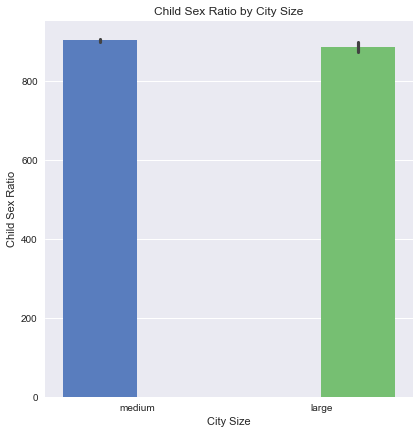

In [14]:
sns.factorplot(x="city_size", y="child_sex_ratio", hue='city_size', data=cities,
                   size=6, kind="bar", palette="muted")
plt.title('Child Sex Ratio by City Size')
plt.xlabel('City Size')
plt.ylabel('Child Sex Ratio')

plt.show()

This bar chart of child sex ratio by city size is somewhat hard to interpret because of the scale of the data. It's difficult to tell if the error bars at the top of each column overlap and, if so, by how much. If the y-axis was truncated, however, it would visually skew the data making the error bars seem more significant than they actually are. 

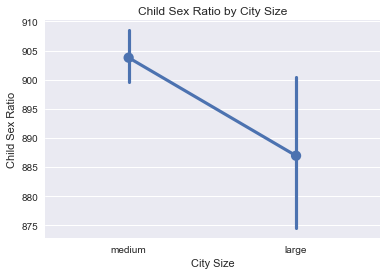

In [15]:
sns.pointplot(x="city_size", y="child_sex_ratio", data=cities)
plt.title('Child Sex Ratio by City Size')
plt.xlabel('City Size')
plt.ylabel('Child Sex Ratio')

plt.show()

This pointplot is much easier to interpret. It clearly shows the mean of each city size category as well as the error bars, which overlap slightly. Since they overlap, we cannot say that the two samples are completely distinct. The p-value for these data is 0.024.

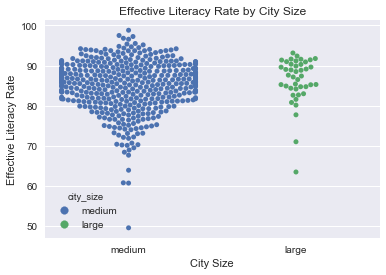

In [16]:
sns.swarmplot(x='city_size', y='effective_literacy_rate_total', hue='city_size', data=cities, size=5)
plt.title('Effective Literacy Rate by City Size')
plt.xlabel('City Size')
plt.ylabel('Effective Literacy Rate')

plt.show()

This swarmplot shows the effective literacy rate by city size. The distributions appear to be similar, although obviously there are many more cities in the medium size category. There is also a much wider range of literacy rates in the medium cities, spanning about 50% up to nearly 100%. 

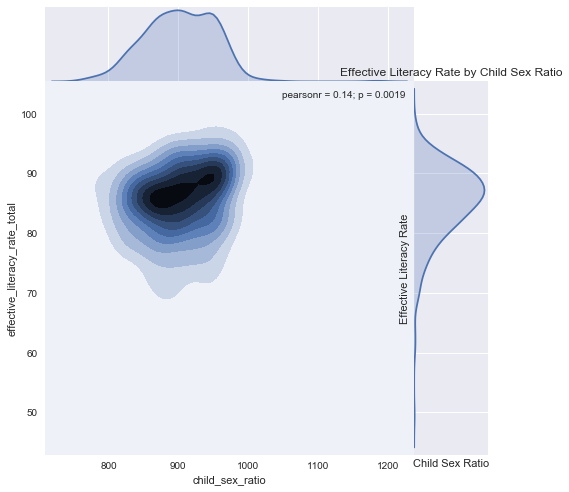

In [17]:
sns.jointplot(cities['child_sex_ratio'], cities['effective_literacy_rate_total'], kind="kde", size=7, space=0)
plt.title('Effective Literacy Rate by Child Sex Ratio')
plt.xlabel('Child Sex Ratio')
plt.ylabel('Effective Literacy Rate')

plt.show()

This jointplot shows the distribution of effective literacy rate by child sex ratio. It does appear that there is a relationship between these two variables. By definition, the sex ratio cannot be above 1000, so that is why there appears to be an upper limit at that point on the x-axis. 

***Further Research***

In future research, I would like to compare different variables in a more robust way, such as quantifying a relationship between effective literacy and child sex ratio. I would also be interested in comparing the rates of the various variables and rates between the male and female populations. 